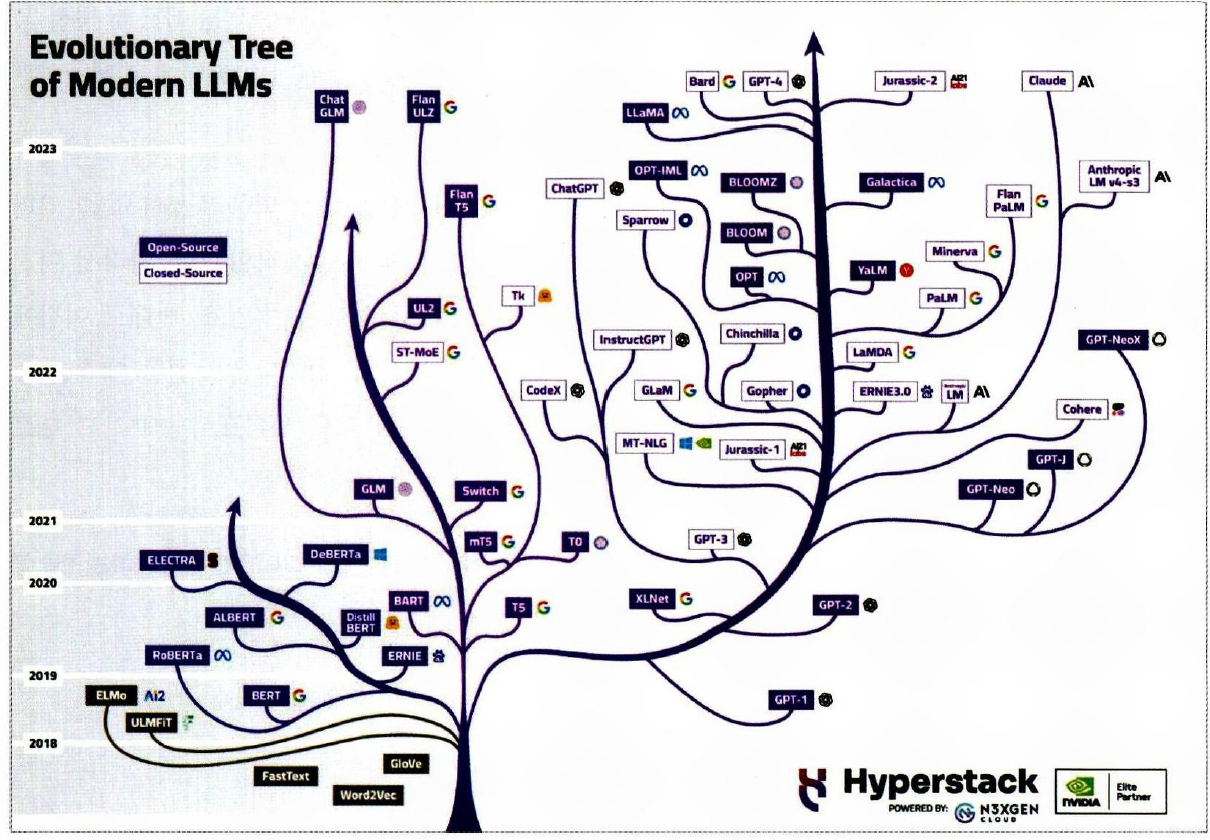

- 왼쪽부터 순서대로,, 인코더 모델, 인코더디코더 모델, 디코더 모델 

인코더 
 - 개체명 인식(텍스트에서 사람이름, 지역명, 회사명 등 고유 명사 식별, 입력 토큰마다 개체명 여부 출력), STS(두 텍스트 유사도 등), 
 - 타임스텝마다 하나의 토큰 생성 (어떤 작업이 시퀀스 데이터를 받아 하나의 결과를 출력한다면 비적함-- 텍스트 분류, 인코더의 출력에 밀집층과 같은 분류를 위한 층 배치하여 해결)

 인코더 - 디코더
  - 요약, 번역, Q&A 등의 시퀀스 투 시퀀드 작업, 질문과 문맥 텍스트가 주어졌을 때 문맥 속에서 답을 찾아 응답 생성
  - 인코더와 디코더가 각각 출력하는 것은 토큰의 임베딩 벡터(또는 은닉 벡터, 문맥에 있는 정보를 통합한 벡터)

디코더 
 - 뛰어난 텍스트 생성 능력, 챗봇, 질답, 요약, 번역 등 > 인코더에서 제공하는 은닉 벡터 없이 어떻게 단독적으로 텍스트 생성?
 - 인코더의 입력이 없으면?? > 이전에 생성한 텍스트인 것처럼 전달하는 초기 텍스트인 '프롬프트' 사용!!!, 사람이 모델을 실행할 때 전달함
 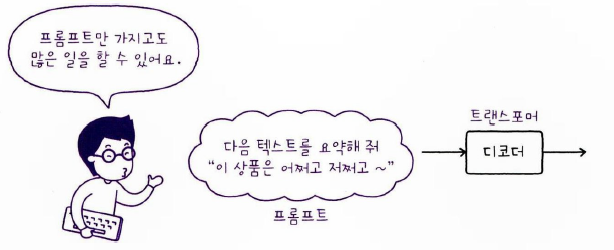


전이학습 : 이미 훈련된 모델(베이스 모델)을 새로운 작업에 맞춰 조정하여 사용하는 방법, 파라미터만 좀 조정하거나 필요한 학습 추가로 시키면 됨

BART: 메타에서 공개한 트랜스포머 기반 인코더 - 디코더 언어 모델

 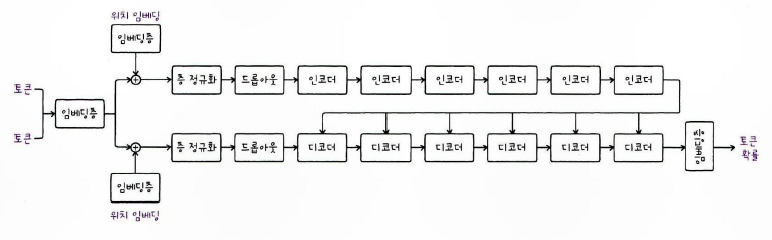
 - BASE : 인코더 디코더 블록 각 6개씩 사용
 - LARGE : 인코 디코 블록 12개씩 사용, 블록 많아질수록 파라미터 수 증가
 - 인코딩: 데이터를 규칙에 따라 숫자로 변환하는 , 의미 반영 X
 - 위치 인코딩 : 토큰 위치에 대한 정보를 만들기 위해 삼각함수 사용, 토큰 위치에 해당하는 정수값을 삼각함수로 위치 정보가 담긴 실수 벡터로 변경
 - 임베딩: 비슷한 것들은 가까운 벡터 공간에 위치시켜 의미와 관계를 반영하여 벡터로 표현
 - 위치 임베딩 : 위치에 따른 관계의 의미를 주기 위해 위치 인코딩에 정수를 실수 벡터 표현으로 바꾸는데 사용하는 임베딩 층을 사용
 - 토큰 아이디를 실수 벡터로 표현하기 위해 임베딩 층을 사용하듯 위치 정수값을 실수 벡터로 바꾸기 위해 임베딩 층 사용
 - 토큰 임베딩 + 위치 임베딩 후 층 정규화와 드롭아웃 층 거짐, 그리고 인코더 블록과 디코더 블록 반복해서 거침, 이후 마지막 출력이 소프트 맥스,, 등 거쳐서 확률로 표현됨
 - 디코더의 마지막 출력은 토큰에 대한 은닉 벡터 즉, 임베딩 벡터
 - 원본 트랜스포머 구조와 다른 점은 활성화 함수로 ReLU 대신 GeLU 사용
 
 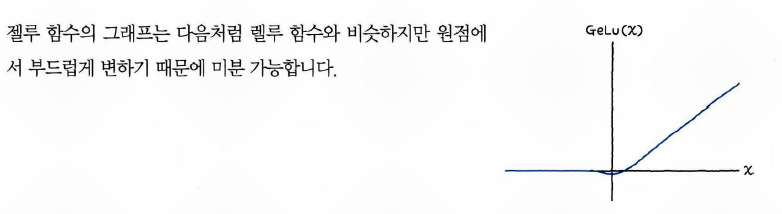


추가
 - BART는 드롭아웃 사용하지만 최신 LLM 모델은 데이터 셋이 커서 여러 에포크동안 훈련하기 힘듦,, 따라서 과대적합을 막기 위한 드롭아웃(데이터 셋 작을때)을 잘 사용하지 않음

In [1]:
from transformers import pipeline  #모델 로드 + 토크나이저 + 전처리/후처리를 한 번에 묶어주는 고수준 API

In [2]:
pipe = pipeline(task = 'summarization', device = 0) 
#GPU를 사용해서 문서 요약 모델을 바로 쓰겠다 = 요약에 적합한 사전 학습 모델, GPU 사용 설정(0), cpu(-1)
#model 지정 안하면 요약 작업을 위한 기본 모델 사용하도록 자동으로 지정함

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


Device set to use cpu


In [3]:
pipe = pipeline(task = 'summarization', model = 'sshleifer/distilbart-cnn-12-6', device = 0) #위와 같은 내용, 모델 지정하면 자동으로 최신 리비전 파일 다운로드

#이 모델의 이름은 허깅페이스 웹사이트 경로를 나타냄 https://huggingface.co/sshleifer/distilbart-cnn-12-6
#이렇게 모델 지정해서 다운로드, 사용하는게 아니라 웹사이트에서 찾은 모델을 pipeline() 함수로 로드하고 싶다면 URL에서 https://huggingface.co/ 다음에 나오는 경로를 MODEL 매개변수 지정하면 됨

Device set to use cpu


In [4]:
#다운받은 pipe 사용

sample_text = """Vincent Willem van Gogh was a Dutch Post-Impressionist painter 
who is among the most famous and influential figures in the history of Western art. 
In just over a decade, he created approximately 2100 artworks, including around 860 oil paintings, most of them in the last two years of his life.
His oeuvre includes landscapes, still lifes, portraits, and self-portraits, most of which are characterised by bold colours and dramatic brushwork 
that contributed to the rise of expressionism in modern art. 
Van Gogh's work was beginning to gain critical attention before he died from a self-inflicted gunshot at age 37. 
During his lifetime, only one of Van Gogh's paintings, The Red Vineyard, was sold.
"""

pipe(sample_text)

#출력은 딕셔너리의 리스트, 따라서 pipe([' ~ ',' ~ ', ...]) 와 같이 여러개의 텍스트를 리스트로 감싸서 호출할 수 있음
#이 bart 모델은 cnn 텍스트 데이터 셋에서 미세튜닝된 모델,, 텍스트를 56-142자 사이 길이로 요약함 범위 바꾸고 싶으면? (min_length, max_length 매개변수 조작)
#kobert : bart 기반의 한국어 인코더-디코더 모델,, bart를 한국어 데이터 셋으로 미세튜닝한 모델!
#bart: Facebook에서 만든 Seq2Seq Transformer 기반 텍스트 생성 모델, 요약 번역 생성 등 텍스트 텍스트 작업에 탁월

[{'summary_text': ' Vincent Willem van Gogh was a Dutch Post-Impressionist painter . His oeuvre includes landscapes, still lifes, portraits, and self-portraits . His work was beginning to gain critical attention before he died from a self-inflicted gunshot at age 37 .'}]

In [5]:
kobart = pipeline(task = 'summarization', model = 'EbanLee/kobart-summary-v3', device = 0)
#EbanLee/kobart-summary-v3: kobart를 요약 작업에 맞춰 미세 튜닝한 모델

You passed `num_labels=3` which is incompatible to the `id2label` map of length `2`.
You passed `num_labels=3` which is incompatible to the `id2label` map of length `2`.
Device set to use cpu


In [6]:
ko_text = """
하나, ‘입문자 맞춤형 7단계 구성’을 따라가며 체계적으로 반복하는 탄탄한 학습 설계!
이 책은 데이터 분석의 핵심 내용을 7단계에 걸쳐 반복 학습하면서 자연스럽게 머릿속에 기억되도록 구성했습니다. [핵심 키워드]와 [시작하기 전에]에서 각 절의 주제에 대한 대표 개념을 워밍업하고, 이론과 실습을 거쳐 마무리에서는 [핵심 포인트]와 [확인 문제]로 한번에 복습합니다. ‘혼자 공부할 수 있는’ 커리큘럼을 그대로 믿고 끝까지 따라가다 보면 데이터 분석 공부가 난생 처음인 입문자도 무리 없이 책을 끝까지 마칠 수 있습니다!
둘, 실제로 일어날 법한 흥미로운 스토리에 담긴 문제를 직접 해결하며 익히는 ‘진짜’ 데이터 분석!
현장감 넘치는 스토리를 통해 데이터를 다루는 방법을 알려 주어 ‘파이썬’과 ‘데이터’가 낯설어도 몰입감 있는 학습을 할 수 있도록 구성했습니다. 이 책에서는 API와 웹 스크래핑을 통해 실제 도서관 데이터와 온라인 서점 웹사이트에서 데이터를 가져오는 등 내 주변에 있는 데이터를 직접 수집할 수 있는 방법을 가이드합니다. 또한 판다스, 넘파이, 맷플롯립 등 데이터 분석에 유용한 각종 파이썬 라이브러리를 활용해 보며 코딩 감각을 익히고, 핵심 통계 지식으로 기본기를 탄탄하게 다질 수 있습니다. 마지막에는 분석을 바탕으로 미래를 예측하는 머신러닝까지 맛볼 수 있어 데이터 분석의 처음부터 끝까지 제대로 배울 수 있습니다.
셋, ‘혼공’의 힘을 실어줄 동영상 강의와 혼공 학습 사이트 지원!
책으로만 학습하기엔 여전히 어려운 입문자를 위해 저자 직강 동영상도 지원합니다. 또한 학습을 하며 궁금한 사항은 언제든지 저자에게 질문할 수 있도록 학습 사이트를 제공합니다. 저자가 질문 하나하나에 직접 답변을 달아 주는 것은 물론, 관련 최신 기술과 정보도 얻을 수 있습니다. 게다가 혼자 공부하고 싶지만 정작 혼자서는 자신 없는 사람들을 위해 혼공 학습단을 운영합니다. 혼공 학습단과 함께하면 마지막까지 포기하지 않고 완주할 수 있을 것입니다.
▶ https://hongong.hanbit.co.kr
▶ https://github.com/rickiepark/hg-da
넷, 언제 어디서든 가볍게 볼 수 있는 혼공 필수 [용어 노트] 제공!
꼭 기억해야 할 핵심 개념과 용어만 따로 정리한 [용어 노트]를 제공합니다. 처음 공부하는 사람들이 프로그래밍을 어려워하는 이유는 낯선 용어 때문입니다. 그러나 어려운 것이 아니라 익숙하지 않아서 헷갈리는 것이므로, 용어나 개념이 잘 생각나지 않을 때는 언제든 부담 없이 [용어 노트]를 펼쳐 보세요. 제시된 용어 외에도 새로운 용어를 추가하면서 자신만의 용어 노트를 완성해가는 과정도 또 다른 재미가 될 것입니다.
"""
kobart(ko_text)

[{'summary_text': '이 책은 데이터 분석의 핵심 내용을 7단계에 걸쳐 반복 학습하면서 머릿속에 기억되도록 구성했습니다. 독자 공부할 수 있는 커리큘럼을 그대로 믿고 끝까지 따라가다 보면 데이터 분석 공부가 난생 처음인 입문자도 무리 없이 책을 끝까지 마칠 수 있습니다. 현장감 넘치는 스토리를 통해 데이터를 다루는 방법을 알려 주어 몰입감 있는 학습을 할 수 있도록 구성했습니다. 저자가 질문 하나하나에 직접 답변을 달아 주는 것은 물론, 최신 기술과 정보도 얻을 수 있습니다. 혼공 학습단과 함께하면 마지막까지 포기하지 않고 완주할 수 있을 것입니다. '}]

In [7]:
# Hugging Face SummarizationPipeline의 기본 설정: do_sample = False > greedy decoding 사용하여 매번 가장 확률 높은 토큰 하나만 선택함. 결과가 항상 동일!, 또한 seed 고정되어있음
# do_sample=True, top_k=50, top_p=0.95, temperature=0.7  이런식으로 파라미터 조정하면 결과 매번 다르게 볼 수 있음
# pipeline()으로 만든 객체를 호출할 때 전달하는 파라미터로 조정
# 그런데!! 이 모델은 기본값으로 beam search 사용, 토큰 단계마다 가장 가능성이 높은 n개의 시퀀스 유지하면서 다음 토큰 생성,, 따라서 실행할 때마다 결과 다를 수 있음

In [8]:
#beam search 예시
"""
summary = pipe(
    sample_text,
    num_beams=5,             # 후보 경로 5개
    num_return_sequences=3,  # 서로 다른 3개의 요약 생성
    do_sample=True
)
"""


'\nsummary = pipe(\n    sample_text,\n    num_beams=5,             # 후보 경로 5개\n    num_return_sequences=3,  # 서로 다른 3개의 요약 생성\n    do_sample=True\n)\n'

In [9]:
kobart(ko_text,
       max_length=100,
       min_length=30,
       do_sample=True,
       top_k=50,
       top_p=0.95)

Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'summary_text': '이 책은 데이터 분석의 핵심 내용을 7단계에 걸쳐 반복 학습하면서 머릿속에 기억되도록 구성했습니다. 독자 공부할 수 있는 커리큘럼을 그대로 믿고 끝까지 따라가다 보면 데이터 분석 공부가 난생 처음인 입문자도 무리 없이 책을 끝까지 마칠 수 있습니다. 현장감 넘치는 스토리를 통해 데이터를 다루는 방법을 알려 주어 몰입감 있는 학습을 할 수 있도록 구성했습니다. 저자가 질문 하나하나에 직접 답변을 달아 주는 것은 물론, 최신 기술과 정보도 얻을 수 있습니다. 혼공 학습단과 함께하면 마지막까지 포기하지 않고 완주할 수 있을 것입니다. '}]

In [10]:
print(kobart.model.config) #모델 설정 파라미터 확인

BartConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_bias_logits": false,
  "add_final_layer_norm": false,
  "architectures": [
    "BartForConditionalGeneration"
  ],
  "attention_dropout": 0.0,
  "author": "EbanLee(rudwo6769@gmail.com)",
  "bos_token_id": 1,
  "classif_dropout": 0.1,
  "classifier_dropout": 0.1,
  "d_model": 768,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 3072,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 6,
  "decoder_start_token_id": 1,
  "do_blenderbot_90_layernorm": false,
  "dropout": 0.1,
  "dtype": "float32",
  "encoder_attention_heads": 16,
  "encoder_ffn_dim": 3072,
  "encoder_layerdrop": 0.0,
  "encoder_layers": 6,
  "eos_token_id": 1,
  "extra_pos_embeddings": 2,
  "force_bos_token_to_be_generated": false,
  "forced_eos_token_id": 1,
  "gradient_checkpointing": false,
  "id2label": {
    "0": "NEGATIVE",
    "1": "POSITIVE"
  },
  "init_std": 0.02,
  "is_encoder_decoder": true,
  "kobart_version": 2.0,
  "label2id

텍스트 토큰화: 텍스트를 토큰 단위로 분할하는 과정, 이 과정은 LLM 모델이 자체적으로 수행하는 것이 아니라 별도로 토크나이저를 통해 토큰화 시킨거를 LLM에 사용함
토크나이저,, 마치 전처리 같지만 전처리는 아니고 훈련데이터로부터 최적의 어휘 사전을 학습하는 모델에 가까움. 토큰의 임베딩 벡터는 LLM모델의 임베딩 층에 있음

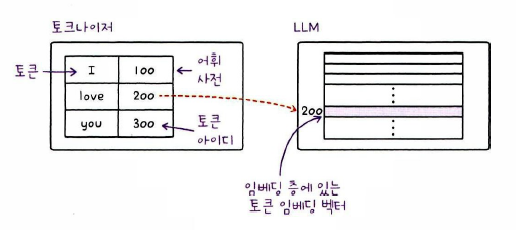

토큰화 방식의 예: BPE(byte-pair-encoding), BPE(byte-level BPE), 워드피스(wordpiece), 유니그램(unigram), 센텐스피스(sentencepiece)

 - BP(pair)E: 전통적 방식, 각 단어를 문자 단위로 분해 > 많이 등장하는 순서대로 문자쌍 또는 부분단어쌍을 찾아 병합하여 어휘사전 추가 > 정의된 어휘사전 크기에 도달할때까지 반복
 - 어휘사전의 문자 개수가 너무너무 많아짐, 어휘사전의 크기가 크면 임베딩 층 크기도 커지고 모델 파라미터 개수도 엄청 늘어남
 - byte level BPE : 텍스트를 바이트 스트림으로 인식하고 자주 등장하는 byte 쌍을 어휘사전에 추가함 (BART도 이 방식)
 - kobart는 문자 수준의 BPE 알고리즘 사용, byte pair encoding

In [15]:
print(kobart.tokenizer.vocab_size)  #이 토크나이저가 가진 어휘사전의 총 토큰 개수 확인
print(len(kobart.tokenizer))

vocab = kobart.tokenizer.vocab
print(len(vocab))

30000
30000
30000


In [ ]:
print(vocab)
list(vocab.items())[:10]
# '_'는 공백을 의미, 즉 단어의 시작부분을 의미함(_는 밑줄 문자가 아니라 유니코드 포인트 U+2581 에 해당하는 문자임)

{'▁행태': 26431, '▁김혜': 27627, '럿': 10293, '빬': 11057, '▁주차': 18239, '데스': 23454, '세이': 22304, '멧': 10577, '냔': 9533, '熀': 5503, '사일': 17844, '▁광범위': 25091, '▁푸른': 22526, '诺': 7632, '▁것이며': 24292, '▁가야': 19173, '▁청취': 27190, '园': 2999, '맹': 10527, '퓘': 13531, '▁메시지를': 20476, '늣': 9712, '듿': 10007, '▁행보': 24865, '獦': 5644, '씟': 11679, '▁강조하고': 26974, '쫘': 12485, '급식': 23851, '▁아이패': 24242, 're': 16651, '버': 10830, '▁범행': 20735, '▁협박': 21535, '▁차를': 19878, '▁말은': 18220, '▁압박': 17793, '▁개시': 25521, 'em': 21746, '▁검정': 28622, '嚣': 2977, '<unused12>': 19, '▁아니다.\n': 15523, '▁관해': 24352, '伶': 2257, '▁유럽의': 24210, 'lo': 20858, '䃏': 2076, '▁수출이': 29128, '르기': 21320, '苅': 6959, '▁말과': 27696, '▁h': 21582, '▁조치가': 27013, '▁세트': 24140, '밵': 10799, '쐖': 11595, '광고': 22683, 'im': 19732, '串': 2126, '생활': 15507, '쪈': 12458, '▁그림': 15947, '언을': 24964, '지고,': 21201, '▁시기': 18415, '▁면역': 23740, '▁공모': 17375, '計': 7443, '자는': 14259, '대행': 23229, 'Ċ': 445, '▁월': 14804, '▁데이터': 17360, '▁당내': 20970, '化': 2682,

[('▁행태', 26431),
 ('▁김혜', 27627),
 ('럿', 10293),
 ('빬', 11057),
 ('▁주차', 18239),
 ('데스', 23454),
 ('세이', 22304),
 ('멧', 10577),
 ('냔', 9533),
 ('熀', 5503)]

In [ ]:
#모델에 문장이 들어오면?
# 1. kobart는 tokenizer를 사용하여 입력 문장을 토큰화하고 각 토큰을 정수 인덱스로 변환
# 2. 토큰 인덱스는 transformer의 인코더로 들어가서 embeding layer에 들어감
# 3. 인코더가 입력 문장의 의미를 이해하고 디코더에 전달함
# 4. 디코더는 시작 토큰<s> 부터 생성 시작하여 매 시점마다 다음 토큰의 확률 분포를 계산(확률 분포는 vocab_size 30000 차원)하여 가장 높은 확률 토큰을 선택하거나 샘플링으로 선택
# 5. 디코더가 마지막 토큰<eos>을 생성하면 종료

모델에 문장이 들어오면?

1. kobart는 tokenizer를 사용하여 입력 문장을 토큰화하고 각 토큰을 정수 인덱스로 변환
2. 토큰 인덱스는 transformer의 인코더로 들어가서 embeding layer에 들어감
3. 인코더가 입력 문장의 의미를 이해하고 디코더에 전달함
4. 디코더는 시작 토큰 \<s> 부터 생성 시작하여 매 시점마다 다음 토큰의 확률 분포를 계산(확률 분포는 vocab_size 30000 차원)하여 가장 높은 확률 토큰을 선택하거나 샘플링으로 선택
5. 디코더가 마지막 토큰 \<eos>을 생성하면 종료

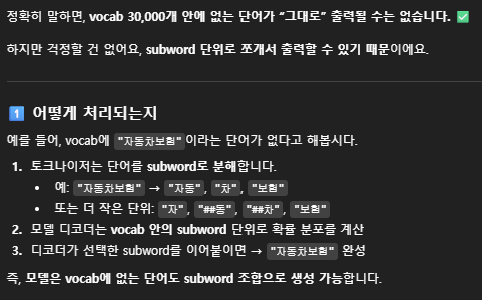

In [26]:
tokens = kobart.tokenizer.tokenize('혼자 만들면서 공부하는 딥러닝') #토큰화
print(tokens)

['▁혼자', '▁만들', '면서', '▁공부', '하는', '▁', '딥', '러', '닝']


In [ ]:
kobart.tokenizer.convert_tokens_to_ids(tokens)  #각 토큰의 id(인덱스? 벡터? 알려줌)
#convert_tokens_to_ids: 각 토큰에 해당하는 토큰 아이디 찾아주는 함수

[16814, 14397, 14125, 16962, 13590, 9694, 1700, 10021, 10277, 9747]

In [ ]:
token_ids = kobart.tokenizer.encode('혼자 만들면서 공부하는 딥러닝') #encode 토큰생성 및 벡터화(id 생성)
print(token_ids)

#encoding 하면 앞, 뒤 0과 1이 생성됨. 

[0, 16814, 14397, 14125, 16962, 14049, 1700, 10021, 10277, 9747, 1]


In [23]:
tokens = kobart.tokenizer.convert_ids_to_tokens(token_ids) #토큰 아이디를 토큰화함
print(tokens)

['<s>', '▁혼자', '▁만들', '면서', '▁공부', '하는', '▁', '딥', '러', '닝', '</s>']


In [ ]:
kobart.tokenizer.decode(token_ids) #토큰 리스트를 원래 문자열로 복원, decode

'<s> 혼자 만들면서 공부하는 딥러닝</s>'

워드피스 토큰화,, BPE 토큰화와 매우 비슷함

훈련 데이터셋에 있는 모든 문자 어휘 사전에서 

가장 많이 등장하는 부분 단어 쌍 어휘 사전에 추가 > 즉 부분 단어를 구성하는 개별 토큰의 빈도 고려

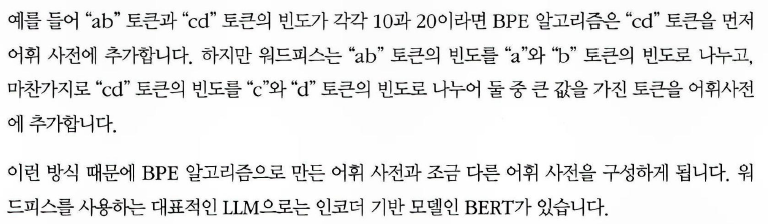

유니그램
 - 초기에 매우 큰 어휘사전을 만든 다음 사전에 지정한 어휘 사전 크기에 도달할때까지 점진적으로 토큰을 제거하는 방식
 - 초기 어휘 사전은 공백으로 나누어진 단어를 부분 단어로 쪼개어 추가하거나 BPE 알고리즘 적용함
 - 그 후 모든 토큰 독립적이라 가정하고 전체의 손실(각 토큰의 등장 확률을 곱한것에 음수를 취함)을 가장 적게 하는 방향으로 토큰 하나씩 제거 
 - 계산하기 쉬운 덧셈으로 바꾸기 위해 로그를 씌움, 손실은 음의 로그 확률이 됨(음의 로그 기능도)
 - 단독으로 사용되지 않고 센텐스 피스와 함께 사용됨

센텐스피스
 - 공백도 하나의 문자로 취급하는 프레임워크(토크나이저 도구) 이는 알고리즘이자 라이브러리이며 어휘 사전 구성하는 것은 아님
 - 원시 텍스트를 그대로 사용하며 공백을 문자 하나도 간주
 - 실제 어휘사전 구성은 유니그램 또는 BPE 사용
 - 위에 나타난 모든 토큰화는 먼저 사전 토큰화 과정으로 공백 등을 기준으로 텍스트를 단어로 나눔> 중국어 같은 언어는 이렇게 분할 불가능
 - 센텐스 피스는 위와 공백도 문자로 취급하여 토큰화를 할 수 있게 해주기때문에 최신 언어 모델에 널리 사용됨